# Validation

In [ ]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import numpy as np
np.random.seed(0)

In [ ]:
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch import nn

mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])

# Download FMNIST training dataset and load training data
trainset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download FMNIST test dataset and load test data
testset = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw




Extracting /root/.pytorch/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/FMNIST/FashionMNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()

In [ ]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
    cum_loss = 0

    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
     
    print(f"Training loss: {cum_loss/len(trainloader)}")

Training loss: 1.033817742838026
Training loss: 0.5608130698836943
Training loss: 0.4914251829960199


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(testloader))

test_image_id = 0 
img = images[test_image_id].view(1, 784) 

with torch.no_grad():
    logps = model(img)

In [ ]:
ps = torch.exp(logps)
ps

tensor([[1.4694e-06, 5.1976e-07, 8.2883e-06, 8.7665e-07, 5.9609e-06, 1.8958e-01,
         4.7358e-06, 1.6259e-01, 4.3656e-03, 6.4344e-01]])

In [ ]:
nps = ps.numpy()[0]
nps

array([1.4694111e-06, 5.1975525e-07, 8.2882934e-06, 8.7665433e-07,
       5.9608965e-06, 1.8958026e-01, 4.7358412e-06, 1.6259281e-01,
       4.3656128e-03, 6.4343941e-01], dtype=float32)

<BarContainer object of 10 artists>

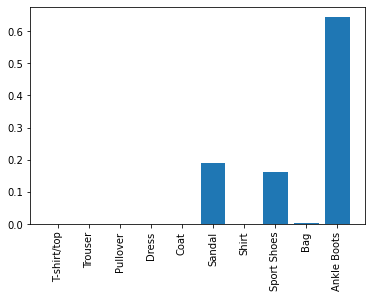

In [ ]:
FMNIST_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sport Shoes','Bag','Ankle Boots']
plt.xticks(np.arange(10),labels=FMNIST_labels,rotation='vertical')
plt.bar(np.arange(10), nps)

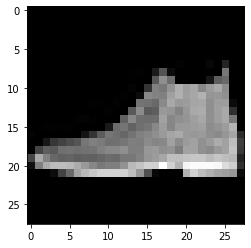

In [ ]:
def denormalize(tensor):
  tensor = tensor*0.5 + 0.5
  return tensor
  
img = img.view(28,-1)
img = denormalize(img)
plt.imshow(img,cmap='gray')

In [ ]:
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1
        
        if cnt > 0:
          break

tensor([[1.4694e-06, 5.1976e-07, 8.2883e-06, 8.7665e-07, 5.9609e-06, 1.8958e-01,
         4.7358e-06, 1.6259e-01, 4.3656e-03, 6.4344e-01],
        [1.2107e-03, 4.7620e-05, 9.0699e-01, 1.9238e-04, 2.3454e-02, 1.1216e-05,
         6.6957e-02, 9.6279e-09, 1.1370e-03, 5.0414e-07],
        [1.1657e-05, 9.9983e-01, 2.9732e-05, 7.5489e-05, 5.6221e-05, 2.3275e-08,
         1.2295e-07, 4.7149e-07, 4.7414e-09, 9.2089e-09],
        [3.0764e-06, 9.9961e-01, 3.7151e-05, 3.0819e-04, 3.7900e-05, 1.6285e-07,
         9.5344e-08, 1.9980e-06, 9.5461e-09, 5.5561e-08],
        [1.1192e-01, 6.6780e-04, 1.7932e-01, 1.2630e-02, 1.5376e-02, 3.0140e-04,
         6.6935e-01, 1.5345e-06, 1.0411e-02, 1.5121e-05],
        [1.5677e-03, 9.8672e-01, 9.1923e-04, 1.9541e-03, 8.7417e-03, 5.6881e-07,
         9.3379e-05, 4.4160e-06, 1.5725e-06, 2.6742e-07],
        [1.0803e-02, 1.0664e-03, 5.4956e-02, 6.7344e-04, 7.9228e-01, 1.1784e-04,
         1.3821e-01, 7.8308e-07, 1.8893e-03, 1.1952e-06],
        [5.8000e-03, 3.8301

In [ ]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)


In [ ]:
pred, labels

(tensor([3, 3, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]),
 tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5]))

In [ ]:
pred == labels

tensor([ True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True])

In [ ]:
with torch.no_grad():
    num_correct = 0
    total = 0

    #set_trace()
    for images, labels in testloader:
        
        logps = model(images)
        output = torch.exp(logps)
        
        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model on the 10000 test images: 81.73% 
